In [1]:
import pandas, seaborn
import sklearn, sklearn.cluster
import matplotlib
matplotlib.rcParams.update({'font.size':20, 'font.family':'sans-serif', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(9, 6), 'axes.labelsize':20})

In [2]:
storing_file = '/home/adrian/gd15/hi/research/huvec/results/untargeted/heatmap_info.csv'
df = pandas.read_csv(storing_file, index_col=0)
df.head(20)

,0,1,2,3,4,5
500.92164,-0.450986,-0.642441,-0.281300,0.466293,0.377050,1.031436
hypothiocyanite,0.177647,0.112808,1.059324,0.342234,0.303839,0.580425
794.40712,0.494817,0.469856,0.336244,-0.271384,-0.423501,-0.923510
N-acetyl-glutamate,-0.324190,-0.540060,-1.015238,0.039214,-0.143395,-0.290712
oxoproline,0.071110,0.160425,0.082154,-0.275028,-0.195693,-1.067624
phosphatidylinositol 38:5,-0.467314,-0.802546,-0.927394,-0.260973,-0.344150,-0.378985
FeCl2,0.680312,0.667558,0.561739,0.122664,-0.930574,-0.580615
epinephrine sulfate,0.233545,1.665070,3.504357,0.398993,2.274986,4.331534
Excluded bc early ret. t 883.5047,-0.401530,-0.684538,-0.973002,-0.372592,-0.365333,-0.417204
794.42386,0.441432,0.552105,0.437386,-0.245329,-0.519875,-0.877299


In [3]:
# detect duplications. create an average and remove
features = df.index.to_list()
multiplets = []
for element in features:
  if features.count(element) > 1:
    multiplets.append(element)
multiplets = list(set(multiplets))
print(len(multiplets), multiplets)

9 ['FeCl2', 'hypothiocyanite', 'cholesterol derivative', 'phosphatidylinositol 38:5', 'reduced glutathione', 'ascorbate', 'methanephrine sulfate', 'N-acetyl-glutamate', 'pantothenic acid']


In [4]:
for multiplet in multiplets:
  new_name = '{}_average'.format(multiplet)
  print(new_name)
  average = pandas.DataFrame(df.loc[multiplet].mean(), columns=[new_name]).transpose()
  df = df.append(average)
  df.drop(multiplet, inplace=True)

FeCl2_average
hypothiocyanite_average
cholesterol derivative_average
phosphatidylinositol 38:5_average
reduced glutathione_average
ascorbate_average
methanephrine sulfate_average
N-acetyl-glutamate_average
pantothenic acid_average


In [5]:
print(df.shape)
df.head(20)

(46, 6)


,0,1,2,3,4,5
500.92164,-0.450986,-0.642441,-0.281300,0.466293,0.377050,1.031436
794.40712,0.494817,0.469856,0.336244,-0.271384,-0.423501,-0.923510
oxoproline,0.071110,0.160425,0.082154,-0.275028,-0.195693,-1.067624
epinephrine sulfate,0.233545,1.665070,3.504357,0.398993,2.274986,4.331534
Excluded bc early ret. t 883.5047,-0.401530,-0.684538,-0.973002,-0.372592,-0.365333,-0.417204
794.42386,0.441432,0.552105,0.437386,-0.245329,-0.519875,-0.877299
160.0512,0.248863,0.260211,0.430146,0.102832,0.567810,0.878511
Excluded bc early ret. t 322.1759,0.039240,0.378477,0.178150,0.206162,0.928717,1.161380
Excluded bc early ret. t 441.25073,0.235665,0.480701,0.258212,0.522513,0.893873,0.868788
493.18282,0.048448,0.327446,-0.095261,-0.235458,-0.682399,-0.798999


# partition

In [6]:
x = df.to_numpy()
k_range = range(3, 12+1)

In [7]:
pvx = []; pvy = []; all_labels = []
for k in k_range:

  kmeans_model = sklearn.cluster.AgglomerativeClustering(n_clusters=k, affinity='cosine', linkage='complete').fit(x)
  labels = kmeans_model.labels_
  
  ss = sklearn.metrics.silhouette_score(x, labels, metric='cosine')
  khi = sklearn.metrics.calinski_harabasz_score(x, labels)
  dbi = sklearn.metrics.davies_bouldin_score(x, labels)

  print(k, ss, khi, dbi)
  pvx.append(k)
  pvy.append(dbi)
  all_labels.append(labels)

3 0.6361774205558008 23.8810634497214 0.916040476465514
4 0.5629712507890674 17.61803579528176 1.0375198871518871
5 0.5807624753809586 14.675463872187974 1.0413444639479013
6 0.5861156449675711 13.079499610220559 1.0123862107401311
7 0.617760806196606 13.8676510988588 1.0692891512428866
8 0.6266582763043261 12.156847562853583 1.0016352928804915
9 0.5908249994901033 10.720383849202324 0.9715857958281825
10 0.6532440414748265 9.751709173297547 0.9334636237328997
11 0.6156632489167542 8.67546672042107 0.9116882350730461
12 0.5906469769400922 8.043220395807534 0.8503938416704182


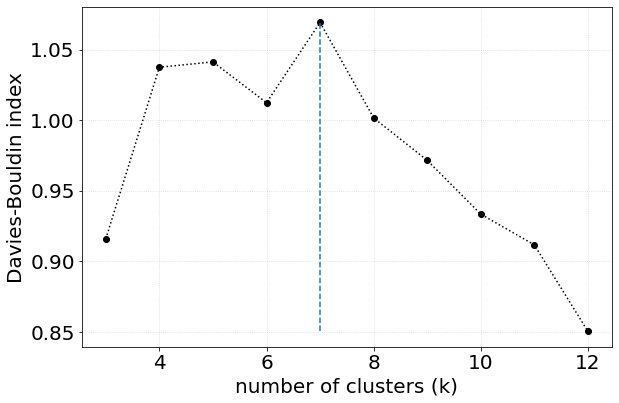

In [8]:
best_partition_index = 4
worst_partition_index = -1

matplotlib.pyplot.plot(pvx, pvy, 'ok')
matplotlib.pyplot.plot(pvx, pvy, ':', color='black')
matplotlib.pyplot.plot([pvx[best_partition_index], pvx[best_partition_index]], [pvy[worst_partition_index], pvy[best_partition_index]], ls='--')

matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.xlabel('number of clusters (k)')
matplotlib.pyplot.ylabel('Davies-Bouldin index')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.savefig('/home/adrian/gd15/hi/research/huvec/results/untargeted/davies-bouldin_index.svg')

In [9]:
groupings = all_labels[best_partition_index]
groupings

array([5, 0, 2, 6, 1, 0, 6, 6, 6, 2, 0, 5, 6, 4, 2, 6, 1, 5, 1, 1, 6, 2,
       0, 2, 3, 0, 1, 0, 5, 2, 0, 0, 4, 4, 4, 0, 1, 0, 3, 6, 1, 1, 5, 6,
       1, 1])

In [10]:
color_options = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:gray', 'tab:olive']
k_colors = []
for i in range(len(df.index)):
  k_colors.append(color_options[groupings[i]])

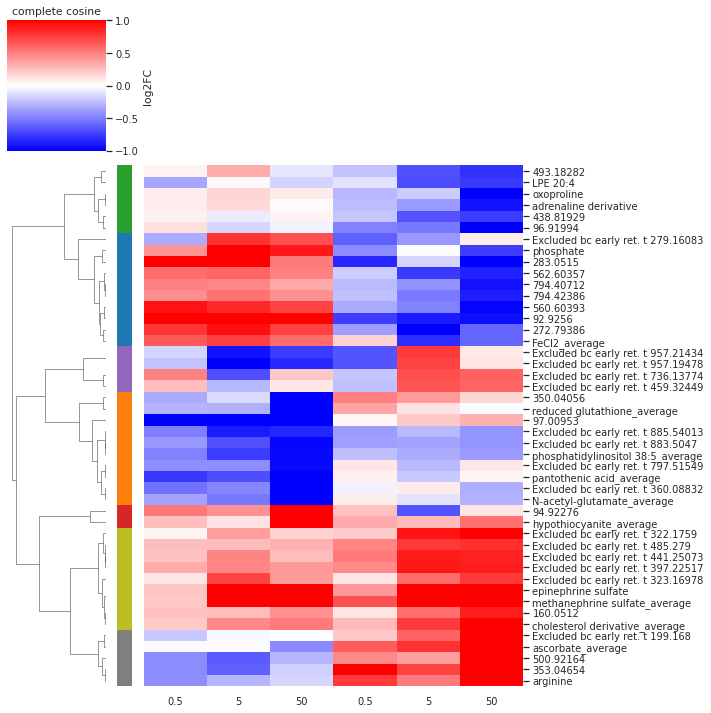

In [11]:
# generate the figure with metabolite names
linkage_method = 'complete'
distance_metric = 'cosine'

seaborn.set(font_scale=0.9)
seaborn.clustermap(df, cmap='bwr', col_cluster=False, vmin=-1, vmax=1, method=linkage_method, metric=distance_metric, yticklabels=1, xticklabels = ['0.5', '5', '50', '0.5', '5', '50'], cbar_kws={'label':'log2FC'}, row_colors=k_colors)

matplotlib.pyplot.title('{} {}'.format(linkage_method, distance_metric))
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.savefig('/home/adrian/gd15/hi/research/huvec/results/untargeted/heatmap.svg')